In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from io import StringIO
import os
import matplotlib.pyplot as plt

In [3]:
# Chaning the directory to current director
os.chdir('C:\\Users\\ayans\\Documents')

#Reading the first worksheet of the data excel file
dfUserRevenues = pd.read_excel('SATO2015.xlsx',sheet_name='UserRevenues')
dfUserRevenues.head() 

,UserID,Revenue_SMS,Revenue_Data,Revenue_WithinNetwork_Calls,Revenue_OffNetwork_Calls,Data_Volume_Used,Calls_Made
0,1001,23.26,2.5,25523,99000,1.161130e+01,375
1,1002,174.45,27.5,14584,77299,2.531725e+03,389
2,1003,14.34,5.0,477,4194,2.913306e+04,15
3,1004,19.25,52.5,50316,52400,2.674413e+05,636
4,1005,2.95,42.5,2568,1701,1.461621e+06,17


In [4]:
#Reading the second worksheet of the data excel file
dfUserComplaints = pd.read_excel('SATO2015.xlsx',sheet_name='UserComplaints')
dfUserComplaints.head() 

,UserID,SubscriptionPeriodInDays,ComplaintCount
0,1001,1914,1
1,1002,2073,1
2,1003,3139,1
3,1004,139,2
4,1005,139,1


In [5]:
#Reading the third worksheet of the data excel file
dfUserStatus = pd.read_excel('SATO2015.xlsx',sheet_name='UserStatus')
dfUserStatus.head() 

,UserID,UserType,Status
0,1001,2G,Churned
1,1002,2G,Churned
2,1003,Other,Churned
3,1004,2G,Active
4,1005,NaN,Active


In [11]:
#Merging all the three data frames to one final data frame
dfSATO = pd.merge(dfUserRevenues,dfUserComplaints, on='UserID',how='inner')
dfSATO = pd.merge(dfSATO,dfUserStatus, on='UserID',how='inner')
dfSATO.head()

,UserID,Revenue_SMS,Revenue_Data,Revenue_WithinNetwork_Calls,Revenue_OffNetwork_Calls,Data_Volume_Used,Calls_Made,SubscriptionPeriodInDays,ComplaintCount,UserType,Status
0,1001,23.26,2.5,25523,99000,1.161130e+01,375,1914,1,2G,Churned
1,1002,174.45,27.5,14584,77299,2.531725e+03,389,2073,1,2G,Churned
2,1003,14.34,5.0,477,4194,2.913306e+04,15,3139,1,Other,Churned
3,1004,19.25,52.5,50316,52400,2.674413e+05,636,139,2,2G,Active
4,1005,2.95,42.5,2568,1701,1.461621e+06,17,139,1,NaN,Active


In [42]:
#Data Processing

#Looking for missing values

#Field: Revenue_SMS
dfSATO[dfSATO['Revenue_SMS'].isnull()].Revenue_SMS   #No missing values found for this field


Series([], Name: Revenue_SMS, dtype: float64)

In [41]:
#Field: Revenue_Data
dfSATO[dfSATO['Revenue_Data'].isnull()].Revenue_Data   #No missing values found for this field

Series([], Name: Revenue_Data, dtype: float64)

In [40]:
#Field: Revenue_WithinNetwork_Calls
dfSATO[dfSATO['Revenue_WithinNetwork_Calls'].isnull()].Revenue_WithinNetwork_Calls   #No missing values found for this field

Series([], Name: Revenue_WithinNetwork_Calls, dtype: int64)

In [39]:
#Field: Revenue_OffNetwork_Calls
dfSATO[dfSATO['Revenue_OffNetwork_Calls'].isnull()].Revenue_OffNetwork_Calls   #No missing values found for this field

Series([], Name: Revenue_OffNetwork_Calls, dtype: int64)

In [38]:
#Field: Data_Volume_Used
dfSATO[dfSATO['Data_Volume_Used'].isnull()].Data_Volume_Used   #No missing values found for this field

Series([], Name: Data_Volume_Used, dtype: float64)

In [37]:
#Field: Calls_Made
dfSATO[dfSATO['Calls_Made'].isnull()].Calls_Made   #No missing values found for this field

Series([], Name: Calls_Made, dtype: int64)

In [36]:
#Field: SubscriptionPeriodInDays
dfSATO[dfSATO['SubscriptionPeriodInDays'].isnull()].SubscriptionPeriodInDays   #No missing values found for this field

Series([], Name: SubscriptionPeriodInDays, dtype: int64)

In [35]:
#Field: ComplaintCount
dfSATO[dfSATO['ComplaintCount'].isnull()].ComplaintCount   #No missing values found for this field

Series([], Name: ComplaintCount, dtype: int64)

In [34]:
#Field: UserType
dfSATO[dfSATO['UserType'].isnull()].UserType   #245 missing values found for this field

4       NaN
9       NaN
21      NaN
37      NaN
38      NaN
40      NaN
51      NaN
54      NaN
64      NaN
71      NaN
75      NaN
77      NaN
86      NaN
90      NaN
93      NaN
94      NaN
109     NaN
120     NaN
132     NaN
142     NaN
192     NaN
207     NaN
237     NaN
240     NaN
269     NaN
271     NaN
280     NaN
284     NaN
297     NaN
300     NaN
       ... 
1690    NaN
1692    NaN
1694    NaN
1712    NaN
1724    NaN
1730    NaN
1738    NaN
1745    NaN
1772    NaN
1782    NaN
1784    NaN
1814    NaN
1821    NaN
1827    NaN
1871    NaN
1893    NaN
1901    NaN
1908    NaN
1917    NaN
1928    NaN
1931    NaN
1934    NaN
1943    NaN
1954    NaN
1962    NaN
1967    NaN
1968    NaN
1970    NaN
1980    NaN
1987    NaN
Name: UserType, Length: 245, dtype: object

In [45]:
# Replacing the missing values for the field: UserType with value:"Other"
dfSATO['UserType']=dfSATO['UserType'].fillna('Other')

In [46]:
#Re-verification of missing values for the field after treatment of missing values
dfSATO[dfSATO['UserType'].isnull()].UserType 

Series([], Name: UserType, dtype: object)

In [47]:
#Field: Status
dfSATO[dfSATO['Status'].isnull()].UserType   #No missing values found for this field

Series([], Name: UserType, dtype: object)

In [52]:
# Adding a new detail to the dataframe by recoding another field
dfSATO['Network_Spectrum']=np.where(dfSATO['UserType']=='2G','2G Spectrum',
                                    np.where(dfSATO['UserType']=='3G','3G Spectrum','Unknown'))
dfSATO.head()

,UserID,Revenue_SMS,Revenue_Data,Revenue_WithinNetwork_Calls,Revenue_OffNetwork_Calls,Data_Volume_Used,Calls_Made,SubscriptionPeriodInDays,ComplaintCount,UserType,Status,Network_Spectrum
0,1001,23.26,2.5,25523,99000,1.161130e+01,375,1914,1,2G,Churned,2G Spectrum
1,1002,174.45,27.5,14584,77299,2.531725e+03,389,2073,1,2G,Churned,2G Spectrum
2,1003,14.34,5.0,477,4194,2.913306e+04,15,3139,1,Other,Churned,Unknown
3,1004,19.25,52.5,50316,52400,2.674413e+05,636,139,2,2G,Active,2G Spectrum
4,1005,2.95,42.5,2568,1701,1.461621e+06,17,139,1,Other,Active,Unknown


In [67]:
# Binning the Field: Data_Volume_Used
Data_VolumeUsed_Binned = pd.qcut(dfSATO['Data_Volume_Used'],5,precision=2)
pd.value_counts(Data_VolumeUsed_Binned)

(2151812.82, 155031212.8]         400
(465830.54, 2151812.82]           400
(59281.5, 465830.54]              400
(888.33, 59281.5]                 400
(0.048999999999999995, 888.33]    400
Name: Data_Volume_Used, dtype: int64

In [57]:
#Data Exploration

#Creating basic summaries for the quantitative fields
dfSATO.columns




Index(['UserID', 'Revenue_SMS', 'Revenue_Data', 'Revenue_WithinNetwork_Calls',
       'Revenue_OffNetwork_Calls', 'Data_Volume_Used', 'Calls_Made',
       'SubscriptionPeriodInDays', 'ComplaintCount', 'UserType', 'Status',
       'Network_Spectrum'],
      dtype='object')

In [91]:
#Creating basic summaries for the Quantitative variables

dfSATO[['Revenue_SMS','Revenue_Data','Revenue_WithinNetwork_Calls','Revenue_OffNetwork_Calls','Data_Volume_Used','Calls_Made','SubscriptionPeriodInDays','ComplaintCount']].describe()

,Revenue_SMS,Revenue_Data,Revenue_WithinNetwork_Calls,Revenue_OffNetwork_Calls,Data_Volume_Used,Calls_Made,SubscriptionPeriodInDays,ComplaintCount
count,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000
mean,31.108605,58.806080,7411.284500,16457.577500,2.773961e+06,240.910500,1469.554500,1.924500
std,57.908418,247.459279,16494.392836,34311.972061,8.845272e+06,369.922258,1286.753291,2.265693
min,0.000000,0.000000,0.000000,0.000000,5.860000e-02,1.000000,-8.000000,1.000000
25%,3.500000,1.250000,114.000000,1432.000000,2.675567e+03,25.000000,323.500000,1.000000
50%,14.810000,13.750000,1940.500000,5039.000000,1.822864e+05,99.000000,1194.500000,1.000000
75%,34.140000,53.750000,7941.000000,15790.000000,1.544505e+06,331.250000,2247.250000,2.000000
max,873.980000,8295.000000,381174.000000,431440.000000,1.550312e+08,5727.000000,5451.000000,49.000000


In [60]:
#Creating basic summaries for the Categorical variables

dfSATO[['UserType','Status','Network_Spectrum']].describe()

,UserType,Status,Network_Spectrum
count,2000,2000,2000
unique,3,2,3
top,3G,Active,3G Spectrum
freq,974,1000,974


In [70]:
#Value Counts for UserType
dfSATO.UserType.value_counts()


3G       974
Other    619
2G       407
Name: UserType, dtype: int64

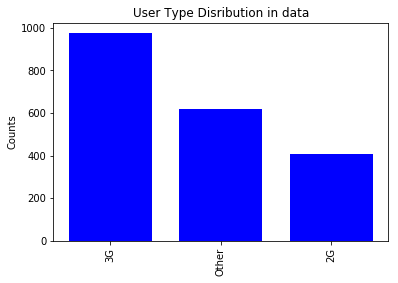

In [75]:
#Bar Plot
UserTypeCnts = dfSATO.UserType.value_counts()
y=UserTypeCnts.values
n=len(y)
x=np.arange(n) 
plt.bar(x,y,width=.75, color = 'blue')
plt.ylabel('Counts')
plt.xticks(x,UserTypeCnts.index)
plt.xticks(x,UserTypeCnts.index,color='black',rotation='vertical')
plt.title('User Type Disribution in data')
plt.show()

In [62]:
#Unique values for UserType
dfSATO.UserType.unique()

array(['2G', 'Other', '3G'], dtype=object)

In [63]:
#Value Counts for Status
dfSATO.Status.value_counts()

Active     1000
Churned    1000
Name: Status, dtype: int64

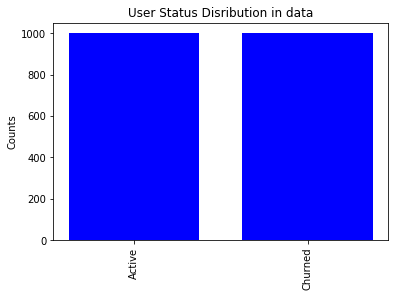

In [76]:
#Bar Plot
StatusCnts = dfSATO.Status.value_counts()
y=StatusCnts.values
n=len(y)
x=np.arange(n) 
plt.bar(x,y,width=.75, color = 'blue')
plt.ylabel('Counts')
plt.xticks(x,StatusCnts.index)
plt.xticks(x,StatusCnts.index,color='black',rotation='vertical')
plt.title('User Status Disribution in data')
plt.show()

In [64]:
#Unique values for Status
dfSATO.Status.unique()

array(['Churned', 'Active'], dtype=object)

In [65]:
#Value Counts for Network Spectrum
dfSATO.Network_Spectrum.value_counts()

3G Spectrum    974
Unknown        619
2G Spectrum    407
Name: Network_Spectrum, dtype: int64

In [66]:
#Unique values for Network Spectrum
dfSATO.Network_Spectrum.unique()

array(['2G Spectrum', 'Unknown', '3G Spectrum'], dtype=object)

In [ ]:
#Number of complaints in case of Churned Customers Vs. Active Customers

In [77]:
dfSATO.Calls_Made.groupby(dfSATO.Status).sum()

Status
Active     342944
Churned    138877
Name: Calls_Made, dtype: int64

In [ ]:
# Relationship between a User's status & the corresponding Revenue received from Calls made 
# within and outside of their network.

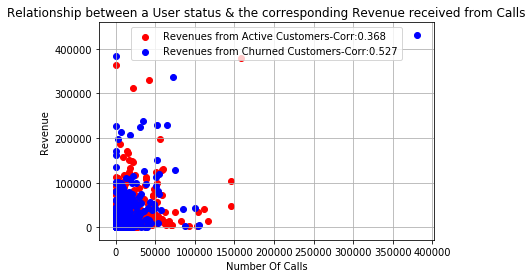

In [90]:
#Scatterplot with 2 series
x1 = dfSATO.Revenue_WithinNetwork_Calls[dfSATO.Status=='Active']
y1 = dfSATO.Revenue_OffNetwork_Calls[dfSATO.Status=='Active']
OneCorr = round(np.corrcoef(x1,y1)[0,1],3)
x2 = dfSATO.Revenue_WithinNetwork_Calls[dfSATO.Status=='Churned']
y2 = dfSATO.Revenue_OffNetwork_Calls[dfSATO.Status=='Churned']
TwoCorr = round(np.corrcoef(x2,y2)[0,1],3)
plt.scatter(x1,y1,color='red',label='Revenues from Active Customers-Corr:'+str(OneCorr))
plt.scatter(x2,y2,color='blue',label='Revenues from Churned Customers-Corr:'+str(TwoCorr))
plt.title('Relationship between a User status & the corresponding Revenue received from Calls')
plt.xlabel('Number Of Calls')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Average calls made,average revenue from SMS and Data services for their Active customers based on the different user types.

In [85]:
dfSATO[['Calls_Made','Revenue_SMS','Revenue_Data']][dfSATO.Status=='Active'].groupby(dfSATO.UserType).mean()

,Calls_Made,Revenue_SMS,Revenue_Data
UserType,,,
2G,315.108696,24.088804,34.393207
3G,350.205323,28.148384,82.016578
Other,347.434483,30.782345,30.909345


In [ ]:
#Average calls made,average revenue from SMS and Data services for their Churned customers based on the different user types.

In [86]:
dfSATO[['Calls_Made','Revenue_SMS','Revenue_Data']][dfSATO.Status=='Churned'].groupby(dfSATO.UserType).mean()

,Calls_Made,Revenue_SMS,Revenue_Data
UserType,,,
2G,109.394619,30.258610,30.858969
3G,166.506696,41.141272,98.633906
Other,121.237082,26.969544,24.649970


In [ ]:
#Relationship between the revenue received from SMS and revenue received from Data

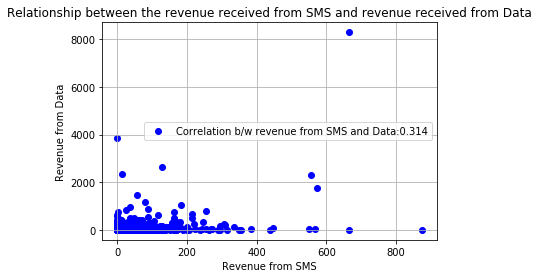

In [87]:
# Scatterplot with 1 series
x1 = dfSATO.Revenue_SMS
y1 = dfSATO.Revenue_Data
OneCorr = round(np.corrcoef(x1,y1)[0,1],3)
plt.scatter(x1,y1,color='blue',label='Correlation b/w revenue from SMS and Data:'+str(OneCorr))
plt.title('Relationship between the revenue received from SMS and revenue received from Data')
plt.xlabel('Revenue from SMS')
plt.ylabel('Revenue from Data')
plt.legend()
plt.grid(True)
plt.show()

In [88]:
#Writing the final dataframe to a .csv file for Part 2 of the project
dfSATO.to_csv('Part2_InputDataFrame.csv')